In [1]:
# Import libraries
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import expectexception

import pytz

from dateutil import tz

from datetime import datetime
from datetime import timedelta

In [2]:
# Read data - Transforming to timezone America/New_York
bikes_data = pd.read_csv('datasets/capital-onebike.csv', parse_dates=['Start date', 'End date']) #list of dates
bikes_data.columns = bikes_data.columns.str.lower().str.replace(' ','_')
bikes_data['start_date'] = bikes_data['start_date'].dt.tz_localize(tz.gettz('America/New_York'), ambiguous=False)
bikes_data['end_date']   = bikes_data['end_date'  ].dt.tz_localize(tz.gettz('America/New_York'), ambiguous=True)

print(bikes_data.shape)
bikes_data.info()

bikes_data[bikes_data.index == 129]

(290, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype                               
---  ------                --------------  -----                               
 0   start_date            290 non-null    datetime64[ns, tzfile('US/Eastern')]
 1   end_date              290 non-null    datetime64[ns, tzfile('US/Eastern')]
 2   start_station_number  290 non-null    int64                               
 3   start_station         290 non-null    object                              
 4   end_station_number    290 non-null    int64                               
 5   end_station           290 non-null    object                              
 6   bike_number           290 non-null    object                              
 7   member_type           290 non-null    object                              
dtypes: datetime64[ns, tzfile('US/Eastern')](2), int64(2), object(4)
memory usage: 18.2

,start_date,end_date,start_station_number,start_station,end_station_number,end_station,bike_number,member_type
129,2017-11-05 01:56:50-05:00,2017-11-05 01:01:04-04:00,31615,6th & H St NE,31627,3rd & M St NE,W20529,Member


In [3]:
# Read data
bikes_data = pd.read_csv('datasets/capital-onebike.csv', parse_dates=['Start date', 'End date']) #list of dates
print(bikes_data.shape)
bikes_data.columns = bikes_data.columns.str.lower().str.replace(' ','_')
print(bikes_data.info())
bikes_data.head(3)

(290, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   start_date            290 non-null    datetime64[ns]
 1   end_date              290 non-null    datetime64[ns]
 2   start_station_number  290 non-null    int64         
 3   start_station         290 non-null    object        
 4   end_station_number    290 non-null    int64         
 5   end_station           290 non-null    object        
 6   bike_number           290 non-null    object        
 7   member_type           290 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 18.2+ KB
None


,start_date,end_date,start_station_number,start_station,end_station_number,end_station,bike_number,member_type
0,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,Member
1,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,Casual
2,2017-10-02 06:37:10,2017-10-02 06:42:53,31036,George Mason Dr & Wilson Blvd,31037,Ballston Metro / N Stuart & 9th St N,W20529,Member


# 4. Easy and Powerful: Dates and Times in Pandas

To conclude this course, you'll apply everything you've learned about working with dates and times in standard Python to working with dates and times in Pandas. With additional information about each bike ride, such as what station it started and stopped at and whether or not the rider had a yearly membership, you'll be able to dig much more deeply into the bike trip data. In this chapter, you'll cover powerful Pandas operations, such as grouping and plotting results by time.

# <font color=darkred>4.1 Reading date and time data in Pandas</font>

1. Reading date and time data in Pandas
>In this chapter, you will use the Pandas library to work with dates and times. You should have encountered Pandas before, but now we will add datetimes to the mix.

2. A simple Pandas example
>To start with, let's load data with Pandas. First, we import pandas, and as is customary we use the alias pd. Our data is in a csv file, so we load it with the read_csv() function. pd.read_csv() has one required argument, the name of the file to load, which in this case is capital-onebike.csv. We save the result to the variable rides. Let's print the first three rows to see what we've got.

3. A simple Pandas example
>Note that the index, listed all the way to the left, starts with zero. Because the table is too wide, it wraps around. Each of these three rows has a start date, an end date, a start station, and end station, the bike number, and whether the ride was from someone who is a member or someone who walked up to the kiosk and bought a ride on the spot.

4. A simple Pandas example
>We can also select a particular column by using the brackets, as here where we call rides['Start date']. And we can get a particular row with .iloc[], in this case row number 2. Because we didn't tell Pandas to treat the start date and end date columns as datetimes, they are simply strings or objects. We want them to be datetimes so we can work with them effectively, using the tools from the first three chapters of this course.

5. Loading datetimes with parse_dates
>If we want Pandas to treat these columns as datetimes, we can make use of the argument parse_dates in read_csv(), and set it to be a list of column names, passed as strings. Now Pandas will read these columns and convert them for us to datetimes. Pandas will try and be intelligent and figure out the format of your datetime strings. In the rare case that this doesn't work, you can use the to_datetime() method that lets you specify the format manually. For more details, see the Pandas documentation.

6. Loading datetimes with parse_dates
>Now when we again ask for the Start date for row 2, we get back a Pandas Timestamp, which for essentially all purposes you can imagine is a Python Datetime object with a different name. They behave basically exactly the same.

7. Timezone-aware arithmetic
>Since our Start date and End date columns are now datetimes, we can deal with them the way we usually deal with datetimes. For example, we can create a new column, Duration, by subtracting Start date from End date. Because each of these columns are datetimes, when we subtract them we get timedeltas. If we print out the first 5 rows, we get that the first ride lasted for only 3 minutes and 1 second, the second ride lasted for 2 hours and 7 minutes, the third ride lasted for 5 minutes 43 seconds, and so on.

8. Loading datetimes with parse_dates
>Pandas has two features worth noting here. Let's see an example of converting our Duration to seconds, and looking at the first 5 rows. First, Pandas code is often written in a "method chaining" style, where we call a method, and then another, and then another. For readability, it's common to break them up with a backslash and a linebreak at the end of each. Second, you can access all of the typical datetime methods within the namespace .dt. For example, we can convert our timedeltas into numbers with .dt.total_seconds(). Now when we look at the results, we see that we've got seconds instead of timedeltas. Our first ride lasted 181 seconds, our second ride 7622 seconds, and so on.

9. Reading date and time data in Pandas
>In this lesson, we discussed loading data in Pandas, and handling basic datetime elements. We talked about using slashes to continue lines, and selecting subsets of rows. Time to practice!

In [4]:
# Select Start date for row 2
display(bikes_data['start_date'].iloc[2])

# Create a duration column
bikes_data['duration'] = bikes_data['end_date'] - bikes_data['start_date']
bikes_data['duration_in_seconds'] = bikes_data['duration'].dt.total_seconds()

# Print the first 5 rows
bikes_data.head(3)

Timestamp('2017-10-02 06:37:10')

,start_date,end_date,start_station_number,start_station,end_station_number,end_station,bike_number,member_type,duration,duration_in_seconds
0,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,Member,0 days 00:03:01,181.0
1,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,Casual,0 days 02:07:02,7622.0
2,2017-10-02 06:37:10,2017-10-02 06:42:53,31036,George Mason Dr & Wilson Blvd,31037,Ballston Metro / N Stuart & 9th St N,W20529,Member,0 days 00:05:43,343.0


# <font color=darkred>4.2 Loading a csv file in Pandas</font> 

The capital_onebike.csv file covers the October, November and December rides of the Capital Bikeshare bike W20529.

Here are the first two columns:

|Start date|End date|...|
|-|-|-|
|2017-10-01 15:23:25|2017-10-01 15:26:26|...|
|2017-10-01 15:42:57|2017-10-01 17:49:59|...|

**Instructions**
- Import Pandas.
- Complete the call to read_csv() so that it correctly parses the date columns Start date and End date.

**Results**

<font color=darkgreen>Great! Did you know that pandas has a pd.read_excel(), pd.read_json(), and even a pd.read_clipboard() function to read tabular data that you've copied from a document or website? Most have date parsing functionality too.</font>

In [5]:
# Load CSV into the rides variable
rides = pd.read_csv('datasets/capital-onebike.csv', parse_dates = ['Start date', 'End date'])

# Print the initial (0th) row
print(rides.iloc[0])

Start date                        2017-10-01 15:23:25
End date                          2017-10-01 15:26:26
Start station number                            31038
Start station                    Glebe Rd & 11th St N
End station number                              31036
End station             George Mason Dr & Wilson Blvd
Bike number                                    W20529
Member type                                    Member
Name: 0, dtype: object


# <font color=darkred>4.3 Making timedelta columns</font> 

Earlier in this course, you wrote a loop to subtract datetime objects and determine how long our sample bike had been out of the docks. Now you'll do the same thing with Pandas.

rides has already been loaded for you.

**Instructions**
- Subtract the Start date column from the End date column to get a Series of timedeltas; assign the result to ride_durations.
- Convert ride_durations into seconds and assign the result to the 'Duration' column of rides.

**Results**

<font color=darkgreen>
Great! Because Pandas supports method chaining, you could also perform this operation in one line:<br>
<code>rides['Duration seconds'] = (rides['End date'] - rides['Start date']).dt.total_seconds()</code>
</font>

In [6]:
# Subtract the start date from the end date
rides['Duration'] = rides['End date'] - rides['Start date']

# Convert the results to seconds
rides['Duration seconds'] = rides['Duration'].dt.total_seconds()

print(rides['Duration seconds'].head())

0     181.0
1    7622.0
2     343.0
3    1278.0
4    1277.0
Name: Duration seconds, dtype: float64


# <font color=darkred>4.4 Summarizing datetime data in Pandas</font> 

1. Summarizing datetime data in Pandas
>In this lesson, we will discuss how to summarize Pandas tables, especially when we have datetime columns. One note: Pandas continues to evolve quickly. Many of the techniques in this chapter don't work on versions of Pandas more than a few years old. If anything breaks on your personal computer, make sure you're using at least Pandas version 0.23.

2. Summarizing data in Pandas
>First things first, let's review some general principles for summarizing data in Pandas. You can call .mean(), .median(), .sum() and so on, on any column where it makes sense. For example, rides['Duration'].mean() returns that the average time the bike was out of the dock was 19 minutes and 38 seconds. We also can ask: how much is this column in total? By using the .sum() method, we can see that the bike was out of the dock for a total of 3 days, 22 hours, 58 minutes and 10 seconds during this time period.

3. Summarizing data in Pandas
>The output of Pandas operations mix perfectly well with the rest of Python. For example, if we divide this sum by 91 days (the number of days from October 1 to December 31), we see that the bike was out about 4.3% of the time, meaning about 96% of the time the bike was in the dock.

4. Summarizing data in Pandas
>For non-numeric columns, we have other ways of making summaries. The .value_counts() method tells us how many times a given value appears. In this case, we want to know how often the Member type is Member or Casual. 236 rides were from Members, and 54 were from Casual riders, who bought a ride at the bike kiosk without a membership. We can also divide by the total number of rides, using len(rides), and Pandas handles the division for us across our result. 81.4% of rides were from members, whereas 18.6% of rides were from casual riders.

5. Summarizing datetime in Pandas
>To make this next section easy, let's make a column called 'Duration seconds', which will be the original column 'Duration' converted to seconds. Pandas has powerful ways to group rows together. First, we can group by values in any column, using the .groupby() method. .groupby() takes a column name and does all subsequent operations on each group. For example, we can groupby Member type, and ask for the mean duration in seconds for each member type. Rides from casual members last nearly twice as long on average.

6. Summarizing datetime in Pandas
>Second, we can also group by time, using the .resample() method. .resample() takes a unit of time (for example, 'M' for month), and a datetime column to group on, in this case 'Start date'. From this we can see that, in the month ending on October 31st, average rides were 1886 seconds, or about 30 minutes, whereas for the month ending December 31, average rides were 635 seconds, or closer to ten minutes.

7. Summarizing datetime in Pandas
>There are also others methods which operate on groups. For example, we can call .size() to get the size of each group. Or we can call .first() to get the first row of each group.

8. Summarizing datetime in Pandas
>Pandas also makes it easy to plot results. Just add the .plot() method at the end of your call and it will pass the results to the Python plotting library matplotlib. It will usually have sensible defaults, though if you want to change things further you can.

9. Summarizing datetime in Pandas
>We can also change the resampling rate from 'M' for months to 'D' for days, and plot again. Now we can see that there is at least one big outlier skewing our data: some ride in the middle of October was 25000 seconds long, or nearly 7 hours. We identified this ride in an earlier chapter as possibly a bike repair. Now we can see that it happened after many days with zero rides, which lends strength to that idea. If the bike was broken and sitting in the dock for awhile, eventually it would have been removed for repairs, then returned.

10. Summarizing datetime data in Pandas
>In this lesson, we discussed how to use basic Pandas operations, such as .mean(), .median() and .sum(), and also .groupy() and .resample() to combine our rows into different groups. Time to practice what you've learned!

In [7]:
print('Min date      :', rides['Start date'].min())
print('Max date      :', rides['End date'].max())

period = timedelta(days=91)
print('Period of time:', period)

datetime(2017, 12, 31) - datetime(2017, 10, 1) 

Min date      : 2017-10-01 15:23:25
Max date      : 2017-12-30 15:19:13
Period of time: 91 days, 0:00:00


datetime.timedelta(days=91)

In [8]:
# Average time out of the dock
display(rides['Duration'].mean())

# Total time out of the dock
display(rides['Duration'].sum())

# Percent of time out of the dock
rides['Duration'].sum() / timedelta(days=91)

Timedelta('0 days 00:19:38.931034482')

Timedelta('3 days 22:58:10')

0.04348417785917786

In [9]:
# Count how many time the bike started at each station
display(rides['Member type'].value_counts())

# Percent of rides by member
rides['Member type'].value_counts() / len(rides)

Member    236
Casual     54
Name: Member type, dtype: int64

Member    0.813793
Casual    0.186207
Name: Member type, dtype: float64

In [10]:
# Average duration per member type
rides.groupby('Member type')['Duration seconds'].mean()

Member type
Casual    1994.666667
Member     992.279661
Name: Duration seconds, dtype: float64

In [11]:
# Average duration by month
rides.resample('M', on = 'Start date')['Duration seconds'].mean()

Start date
2017-10-31    1886.453704
2017-11-30     854.174757
2017-12-31     635.101266
Freq: M, Name: Duration seconds, dtype: float64

In [12]:
# Size per group
rides.groupby('Member type').size()

Member type
Casual     54
Member    236
dtype: int64

In [13]:
# First ride per group
rides.groupby('Member type').first()

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Duration,Duration seconds
Member type,,,,,,,,,
Casual,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,0 days 02:07:02,7622.0
Member,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,0 days 00:03:01,181.0


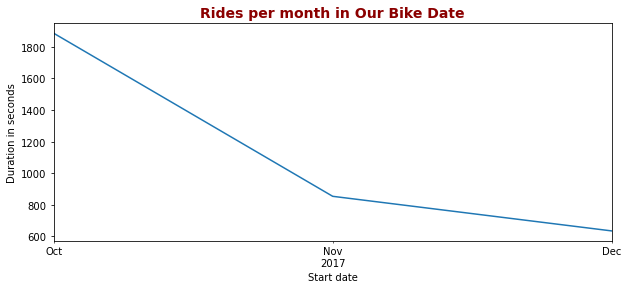

In [14]:
title_param    = {'color': 'darkred', 'fontsize': 14, 'weight': 'bold'}

rides.resample('M', on = 'Start date')['Duration seconds'].mean().plot(figsize=(10,4))
plt.ylabel('Duration in seconds')
plt.title('Rides per month in Our Bike Date', **title_param)
plt.show()

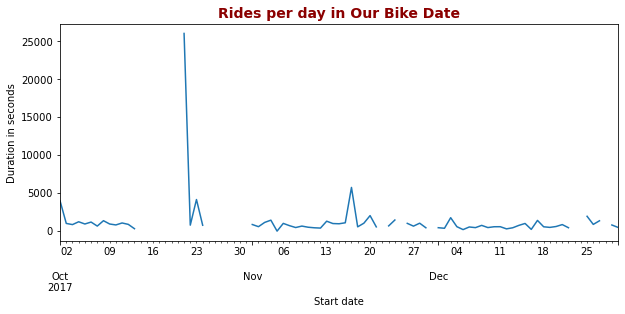

In [15]:
rides.resample('D', on = 'Start date')['Duration seconds'].mean().plot(figsize=(10,4))
plt.ylabel('Duration in seconds')
plt.title('Rides per day in Our Bike Date', **title_param)
plt.show()

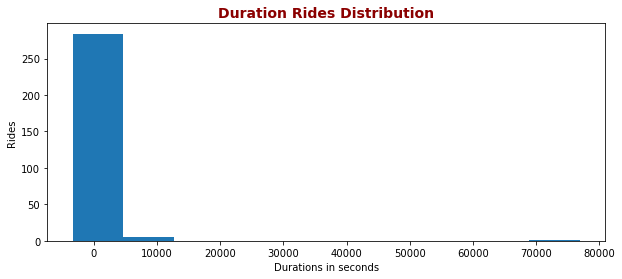

In [16]:
rides['Duration seconds'].hist(grid=False, figsize=(10,4))
#_ = sns.histplot(data=rides, x="Duration seconds", kde=True)
plt.xlabel('Durations in seconds')
plt.ylabel('Rides')
plt.title('Duration Rides Distribution',**title_param)
plt.show()

# <font color=darkred>4.5 How many joyrides?</font> 

Suppose you have a theory that some people take long bike rides before putting their bike back in the same dock. Let's call these rides "joyrides".

You only have data on one bike, so while you can't draw any bigger conclusions, it's certainly worth a look.

Are there many joyrides? How long were they in our data set? Use the median instead of the mean, because we know there are some very long trips in our data set that might skew the answer, and the median is less sensitive to outliers.

**Instructions**
- Create a Pandas Series which is True when Start station and End station are the same, and assign the result to joyrides.
- Calculate the median duration of all rides.
- Calculate the median duration of joyrides.

**Results**

<font color=darkgreen>Great work! Pandas makes analyses like these concise to write and reason about. Writing this as a for loop would have been more complex.</font>

In [17]:
# Create joyrides
joyrides = (rides['Start station'] == rides['End station'])

# Total number of joyrides
print("{} rides were joyrides".format(joyrides.sum()))

# Median of all rides
print("The median duration overall was {:.2f} seconds"\
      .format(rides['Duration seconds'].median()))

# Median of joyrides
print("The median duration for joyrides was {:.2f} seconds"\
      .format(rides[joyrides]['Duration seconds'].median()))

6 rides were joyrides
The median duration overall was 660.00 seconds
The median duration for joyrides was 2642.50 seconds


# <font color=darkred>4.6 It's getting cold outside, W20529</font> 

Washington, D.C. has mild weather overall, but the average high temperature in October (68ºF / 20ºC) is certainly higher than the average high temperature in December (47ºF / 8ºC). People also travel more in December, and they work fewer days so they commute less.

How might the weather or the season have affected the length of bike trips?

**Instructions**
- Resample rides to the daily level, based on the Start date column.
- Plot the .size() of each result.
- Since the daily time series is so noisy for this one bike, change the resampling to be monthly.

**Results**

<font color=darkgreen>Nice! As you can see, the pattern is clearer at the monthly level: there were fewer rides in November, and then fewer still in December, possibly because the temperature got colder.</font>

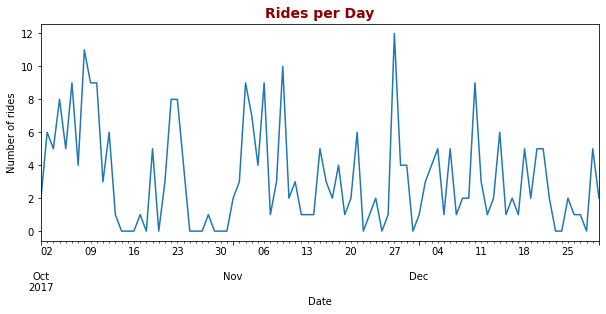

In [18]:
# Resample rides to daily, take the size, plot the results
rides.resample('D', on = 'Start date').size().plot(figsize=(10,4)) #ylim = [0, 15], 

# Show the results
plt.ylabel('Number of rides')
plt.xlabel('Date')
plt.title('Rides per Day',**title_param)
plt.show()

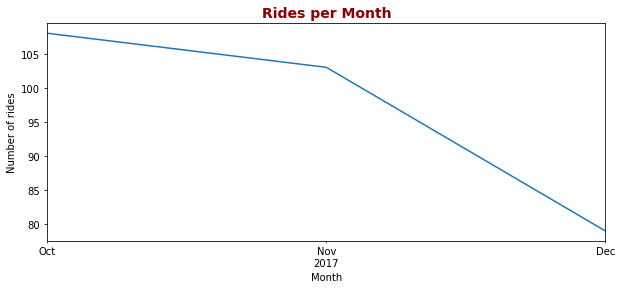

In [19]:
# Resample rides to monthly, take the size, plot the results
rides.resample('M', on = 'Start date').size().plot(figsize=(10,4)) #,ylim = [0, 150])

# Show the results
plt.ylabel('Number of rides')
plt.xlabel('Month')
plt.title('Rides per Month',**title_param)
plt.show()

# <font color=darkred>4.7 Members vs casual riders over time</font> 

Riders can either be "Members", meaning they pay yearly for the ability to take a bike at any time, or "Casual", meaning they pay at the kiosk attached to the bike dock.

Do members and casual riders drop off at the same rate over October to December, or does one drop off faster than the other?

As before, rides has been loaded for you. You're going to use the Pandas method .value_counts(), which returns the number of instances of each value in a Series. In this case, the counts of "Member" or "Casual".

**Instructions**
- Set monthly_rides to be a resampled version of rides, by month, based on start date.
- Use the method .value_counts() to find out how many Member and Casual rides there were, and divide them by the total number of rides per month.

**Results**

<font color=darkgreen>Nice! Note that by default, .resample() labels Monthly resampling with the last day in the month and not the first. It certainly looks like the fraction of Casual riders went down as the number of rides dropped. With a little more digging, you could figure out if keeping Member rides only would be enough to stabilize the usage numbers throughout the fall.</font>

In [20]:
# Resample rides to be monthly on the basis of Start date
monthly_rides = rides.resample('M', on='Start date')['Member type']

display(monthly_rides.size())
display(monthly_rides.value_counts())

# Take the ratio of the .value_counts() over the total number of rides
monthly_rides.value_counts() / monthly_rides.size()

Start date
2017-10-31    108
2017-11-30    103
2017-12-31     79
Freq: M, Name: Member type, dtype: int64

Start date  Member type
2017-10-31  Member         83
            Casual         25
2017-11-30  Member         85
            Casual         18
2017-12-31  Member         68
            Casual         11
Name: Member type, dtype: int64

Start date  Member type
2017-10-31  Member         0.768519
            Casual         0.231481
2017-11-30  Member         0.825243
            Casual         0.174757
2017-12-31  Member         0.860759
            Casual         0.139241
Name: Member type, dtype: float64

# <font color=darkred>4.8 Combining groupby() and resample()</font>

A very powerful method in Pandas is .groupby(). Whereas .resample() groups rows by some time or date information, .groupby() groups rows based on the values in one or more columns. For example, rides.groupby('Member type').size() would tell us how many rides there were by member type in our entire DataFrame.

.resample() can be called after .groupby(). For example, how long was the median ride by month, and by Membership type?

**Instructions**
- Complete the .groupby() call to group by 'Member type', and the .resample() call to resample according to 'Start date', by month.
- Print the median Duration for each group.

**Results**

<font color=darkgreen>Nice! It looks like casual riders consistently took longer rides, but that both groups took shorter rides as the months went by. Note that, by combining grouping and resampling, you can answer a lot of questions about nearly any data set that includes time as a feature. Keep in mind that you can also group by more than one column at once.</font>

In [21]:
rides.groupby('Member type').size()

Member type
Casual     54
Member    236
dtype: int64

Member type  Start date
Casual       2017-10-31    1636.0
             2017-11-30    1159.5
             2017-12-31     850.0
Member       2017-10-31     671.0
             2017-11-30     655.0
             2017-12-31     387.5
Name: Duration seconds, dtype: float64


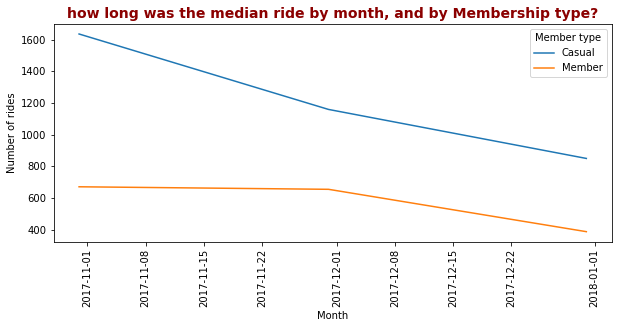

In [22]:
# Group rides by member type, and resample to the month
grouped = rides.groupby('Member type').resample('M', on = 'Start date')

# Print the median duration for each group
print(grouped['Duration seconds'].median())

# Show the results
grouped = grouped['Duration seconds'].median().reset_index()

fig = plt.figure(figsize=(10, 4))
sns.lineplot(data=grouped, x='Start date', y='Duration seconds', hue='Member type') #,ylim = [0, 150])
plt.ylabel('Number of rides')
plt.xlabel('Month')
plt.xticks(rotation=90) 
plt.title('how long was the median ride by month, and by Membership type?',**title_param)
plt.show()

# <font color=darkred>4.9 Additional datetime methods in Pandas</font> 

1. Additional datetime methods in Pandas
>In this final lesson, we will cover some additional Pandas methods for working with dates and times. By the end of this lesson, you will understand how to handle timezones in Pandas, as well as other common datetime operations.

2. Timezones in Pandas
>First, a reminder of the importance of timezones. If we ask Pandas to tell us the smallest ride duration in seconds, using the .dt.total_seconds() method and then the .min() method, we get -3346 seconds, or -55 minutes. Yikes! Something is wrong, since our ride durations shouldn't ever be negative.

3. Timezones in Pandas
>The answer, as it was when we looked at this data set in standard Python, is Daylight Saving. Just like with standard Python, these datetime objects start off as timezone-naive. They're not tied to any absolute time with a UTC offset. Let's see the first three Start dates so we can see how they're displayed and check that there is no UTC offset. To start, we want those same three datetimes to be put into a timezone. The method for this in Pandas is .dt.tz_localize(). Now when we look at the localized datetimes, we can see that they have a UTC offset.

4. Timezones in Pandas
>However, if we try to convert our entire Start date column to the America/New_York timezone, Pandas will throw an AmbiguousTimeError. As expected, we have one datetime that occurs during the Daylight Saving shift. Following the advice of the error message, we can set the ambiguous argument in the .dt.tz_localize() method. By default, it raises an error, as we saw above. We also can pass the string 'NaT', which says that if the converter gets confused, it should set the bad result as Not a Time. Pandas is smart enough to skip over NaTs when it sees them, so our .min() and other methods will just ignore this one row.

5. Timezones in Pandas
>Now that we've fixed the timezones, we should recalculate our duations, in case any rides had been across Daylight Saving boundaries. This time, when we take Durations, convert it to seconds, and take the minimum, we get a much more sensible 116.0 seconds, or about two minutes.

6. Timezones in Pandas
>Just to know what we're looking at, let's pull up our problematic row. Here, both the start and end time were ambiguous, so they've been set to NaT. As a result, our Duration, since it's the difference of two undefined times, is also NaT.

7. Other datetime operations in Pandas
>There are other datetime operations you should know about too. The simplest are ones you're already familiar with: .year, .month, and so on. In Pandas, these are accessed with .dt.year, .dt.month, etc. Here, for example, is the year of the first three rows. There are other useful properties that Pandas gives you, some of which are not available in standard Python. For example, the attribute .dt.weekday_name gives a Series which is the name of the weekday for each element in a datetime series. This can be used in .groupby() calls too.

8. Other parts of Pandas
>Pandas also lets you shift rows up or down with the .shift() method. Here we've shifted the rides one row forward so that our zeroth row is now NaT, and our first row has the same value that our zeroth row had before. This is useful if you want to, for example, line up the end times of each row with the start time of the next one. Now you can answer questions about how each ride compares to the previous one! You'll cover this in an exercise shortly.

9. Additional datetime methods in Pandas
>In this lesson, we looked at additional methods in Pandas that are relevant to working with datetimes. Hopefully, this gave you a good taste of all the things Pandas is capable of! Time to try them out in the exercises.

In [23]:
# Min rides, show ambiguous date in the records
rides['Duration'].dt.total_seconds().min()

-3346.0

In [24]:
# Timezones in Pandas
display(rides['Start date'].head(3))

rides['Start date'].head(3).dt.tz_localize('America/New_York')

0   2017-10-01 15:23:25
1   2017-10-01 15:42:57
2   2017-10-02 06:37:10
Name: Start date, dtype: datetime64[ns]

0   2017-10-01 15:23:25-04:00
1   2017-10-01 15:42:57-04:00
2   2017-10-02 06:37:10-04:00
Name: Start date, dtype: datetime64[ns, America/New_York]

In [25]:
%%expect_exception pytz.AmbiguousTimeError

# Try to set a timezone...
rides['Start date'] = rides['Start date'].dt.tz_localize('America/New_York')

---------------------------------------------------------------------------
AmbiguousTimeError                        Traceback (most recent call last)
<ipython-input-25-c49e33f1bd54> in <module>
      1 # Try to set a timezone...
----> 2 rides['Start date'] = rides['Start date'].dt.tz_localize('America/New_York')

C:\Anaconda3\envs\datascience\lib\site-packages\pandas\core\accessor.py in f(self, *args, **kwargs)
     90         def _create_delegator_method(name):
     91             def f(self, *args, **kwargs):
---> 92                 return self._delegate_method(name, *args, **kwargs)
     93 
     94             f.__name__ = name

C:\Anaconda3\envs\datascience\lib\site-packages\pandas\core\indexes\accessors.py in _delegate_method(self, name, *args, **kwargs)
    107 
    108         method = getattr(values, name)
--> 109         result = method(*args, **kwargs)
    110 
    111         if not is_list_like(result):

C:\Anaconda3\envs\datascience\lib\site-packages\pandas\core\indexes

In [26]:
# Handle ambiguous datetimes
rides['start_date'] = rides['Start date'].dt.tz_localize('America/New_York', ambiguous='NaT')
rides['end_date'] = rides['End date'].dt.tz_localize('America/New_York', ambiguous='NaT')

# Re-calculate duration, ignoring bad row
rides['duration_seconds'] = (rides['end_date'] - rides['start_date']).dt.total_seconds()

# Find the minimum again
display(rides['duration_seconds'].min())

# Look at problematic row
#rides.iloc[129]
rides[rides.index == 129]

116.00000000000001

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Duration,Duration seconds,start_date,end_date,duration_seconds
129,2017-11-05 01:56:50,2017-11-05 01:01:04,31615,6th & H St NE,31627,3rd & M St NE,W20529,Member,-1 days +23:04:14,-3346.0,NaT,NaT,NaN


In [27]:
# Year of first three rows
display(rides['start_date'].head(3).dt.year)

# See weekdays for first three rides
rides['start_date'].head(3).dt.day_name() # .dt.weekday_name is for PANDAS <= 0.22

0    2017
1    2017
2    2017
Name: start_date, dtype: int64

0    Sunday
1    Sunday
2    Monday
Name: start_date, dtype: object

In [28]:
display(rides['end_date'].head(5))

# Shift the indexes forward one, padding with NaT
rides['end_date'].shift(1).head(5)

0   2017-10-01 15:26:26-04:00
1   2017-10-01 17:49:59-04:00
2   2017-10-02 06:42:53-04:00
3   2017-10-02 09:18:03-04:00
4   2017-10-02 18:45:05-04:00
Name: end_date, dtype: datetime64[ns, America/New_York]

0                         NaT
1   2017-10-01 15:26:26-04:00
2   2017-10-01 17:49:59-04:00
3   2017-10-02 06:42:53-04:00
4   2017-10-02 09:18:03-04:00
Name: end_date, dtype: datetime64[ns, America/New_York]

# <font color=darkred>4.10 Timezones in Pandas</font> 

Earlier in this course, you assigned a timezone to each datetime in a list. Now with Pandas you can do that with a single method call.

(Note that, just as before, your data set actually includes some ambiguous datetimes on account of daylight saving; for now, we'll tell Pandas to not even try on those ones. Figuring them out would require more work.)

**Instructions**
- Make the Start date column timezone aware by localizing it to 'America/New_York' while ignoring any ambiguous datetimes.
- Now switch the Start date column to the timezone 'Europe/London' using the .dt.tz_convert() method.

**Results**

<font color=darkgreen>Nicely done! dt.tzconvert() converts to a new timezone, whereas dt.tzlocalize() sets a timezone in the first place. You now know how to deal with datetimes in Pandas.</font>

In [29]:
# Handle ambiguous datetimes
rides['start_date'] = rides['Start date'].dt.tz_localize('America/New_York', ambiguous='NaT')

# Print first value
print('America/New_York:', rides['start_date'].iloc[0])

# Convert the Start date column to Europe/London
rides['start_date'] = rides['start_date'].dt.tz_convert('Europe/London')

# Print the new value
print('Europe/London   :', rides['start_date'].iloc[0])

America/New_York: 2017-10-01 15:23:25-04:00
Europe/London   : 2017-10-01 20:23:25+01:00


In [30]:
%%expect_exception TypeError

# Subtraction must have the same timezones or no timezones
# Find the minimum again
(rides['end_date'] - rides['start_date']).dt.total_seconds().min()

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-30-f0062ec79cae> in <module>
      1 # Subtraction must have the same timezones or no timezones
      2 # Find the minimum again
----> 3 (rides['end_date'] - rides['start_date']).dt.total_seconds().min()

C:\Anaconda3\envs\datascience\lib\site-packages\pandas\core\ops\common.py in new_method(self, other)
     63         other = item_from_zerodim(other)
     64 
---> 65         return method(self, other)
     66 
     67     return new_method

C:\Anaconda3\envs\datascience\lib\site-packages\pandas\core\arraylike.py in __sub__(self, other)
     95     @unpack_zerodim_and_defer("__sub__")
     96     def __sub__(self, other):
---> 97         return self._arith_method(other, operator.sub)
     98 
     99     @unpack_zerodim_and_defer("__rsub__")

C:\Anaconda3\envs\datascience\lib\site-packages\pandas\core\series.py in _arith

# <font color=darkred>4.11 How long per weekday?</font> 

Pandas has a number of datetime-related attributes within the .dt accessor. Many of them are ones you've encountered before, like .dt.month. Others are convenient and save time compared to standard Python, like .dt.weekday_name.

**Instructions**
- Add a new column to rides called 'Ride start weekday', which is the weekday of the Start date.
- Print the median ride duration for each weekday.

**Results**

<font color=darkgreen>Well done! There are .dt attributes for all of the common things you might want to pull out of a datetime, such as the day, month, year, hour, and so on, and also some additional convenience ones, such as quarter and week of the year out of 52.</font>

In [31]:
# Return the Start date column to America/New_York
rides['start_date'] = rides['start_date'].dt.tz_convert('America/New_York')

# Add a column for the weekday of the start of the ride
rides['Ride start weekday'] = rides['start_date'].dt.day_name() # .dt.weekday_name is for PANDAS <= 0.22

# Print the median trip time per weekday
rides.groupby('Ride start weekday')['duration_seconds'].median()

Ride start weekday
Friday       724.5
Monday       810.5
Saturday     462.0
Sunday       917.0
Thursday     652.0
Tuesday      641.5
Wednesday    585.0
Name: duration_seconds, dtype: float64

In [32]:
# Quarter of the year.
rides.groupby(rides.start_date.dt.quarter)['duration_seconds'].median()

start_date
4.0    661.0
Name: duration_seconds, dtype: float64

In [33]:
# Week of the year.
rides.groupby(rides.start_date.dt.isocalendar().week)['duration_seconds'].median()

week
39    3901.5
40     846.0
41     764.0
42     671.0
43    1439.0
44     957.0
45     584.0
46     961.0
47     727.5
48     527.5
49     384.0
50     407.0
51     445.0
52     651.0
Name: duration_seconds, dtype: float64

In [34]:
# Day of the year.
rides.start_date.dt.dayofyear.head()

0    274.0
1    274.0
2    275.0
3    275.0
4    275.0
Name: start_date, dtype: float64

In [35]:
# Julian date
pd.DatetimeIndex(rides.start_date).to_julian_date()

Float64Index([ 2458028.141261574, 2458028.1548263887, 2458028.7758101854,
              2458028.8727430557,  2458029.266527778, 2458029.2834259258,
              2458029.3042824073, 2458029.3177314815,  2458029.850185185,
               2458030.261886574,
              ...
                2458113.07412037, 2458113.9446296296, 2458115.2056944445,
              2458116.7517824075, 2458117.0146180554, 2458117.1061921297,
              2458117.1308564814, 2458117.3566435184, 2458118.0771180554,
               2458118.131284722],
             dtype='float64', name='start_date', length=290)

# <font color=darkred>4.12 How long between rides?</font> 

For your final exercise, let's take advantage of Pandas indexing to do something interesting. How much time elapsed between rides?

**Instructions**
- Calculate the difference in the Start date of the current row and the End date of the previous row and assign it to rides['Time since'].
- Convert rides['Time since'] to seconds to make it easier to work with.
- Resample rides to be in monthly buckets according to the Start date.
- Divide the average by (60*60) to get the number of hours on average that W20529 waited in the dock before being picked up again.

**Results**

<font color=darkgreen>Great job! As you can see, there are a huge number of Pandas tricks that let you express complex logic in just a few lines, assuming you understand how the indexes actually work. If you haven't taken it yet, have you considered taking Pandas Foundations? In addition to lots of other useful Pandas information, it covers working with time series (like stock prices) in Pandas. Time series have many overlapping techniques with datetime data.</font>

In [36]:
# Shift the index of the end date up one; now subract it from the start date
rides['Time since'] = rides['Start date'] - (rides['End date'].shift(1))

# Move from a timedelta to a number of seconds, which is easier to work with
rides['Time since'] = rides['Time since'].dt.total_seconds()

# Resample to the month
monthly = rides.resample('M', on = 'Start date')

# Print the average hours between rides each month
print(monthly['Time since'].mean()/(60*60))

Start date
2017-10-31    5.519242
2017-11-30    7.256443
2017-12-31    9.202380
Freq: M, Name: Time since, dtype: float64


# <font color=darkred>4.13 Wrap-up</font> 

1. Wrap-up
>In this course, you learned many things about working with dates and times in Python. Let's recap what we've covered.

2. Recap: Dates and Calendars
>In the first chapter of this course, we covered dates in Python. The date() class takes a year, month, and day as arguments. A date object has accessors like .year, and also methods like .weekday(). date objects can be compared like numbers, using min(), max(), and sort(). You can subtract one date from another to get a timedelta. To turn date objects into strings, use the .isoformat() or .strftime() methods.

3. Recap: Combining Dates and Times
>In the second chapter of this course, we covered datetimes. The datetime() class takes all the arguments of date(), plus an hour, minute, second, and microsecond. All of the additional arguments are optional; otherwise, they're set to zero by default. You can replace any value in a datetime with the .replace() method. Convert a timedelta into an integer with its .total_seconds() method. Turn strings into dates with .strptime() and dates into strings with .strftime().

4. Recap: Timezones and Daylight Saving
>In the third chapter of this course, we covered timezones and daylight saving. A datetime is "timezone aware" when it has its tzinfo set. Otherwise it is "timezone naive". Setting a timezone tells a datetime how to align itself to UTC, the universal time standard. Use the .replace() method to change the timezone of a datetime, leaving the date and time the same. Use the .astimezone() method to shift the date and time to match the new timezone. dateutil.tz provides a comprehensive, updated timezone database.

5. Recap: Easy and Powerful Timestamps in Pandas
>In the fourth and final chapter of this course, we covered using Pandas for handling dates and times. When reading a csv, set the parse_dates argument to be the list of columns which should be parsed as datetimes. If setting parse_dates doesn't work, use the pd.to_datetime() function. Grouping rows with .groupby() lets you calculate aggregates per group. For example, .first(), .min() or .mean(). .resample() groups rows on the basis of a datetime column, by year, month, day, and so on. Use .tz_localize() to set a timezone, keeping the date and time the same. Use .tz_convert() to change the date and time to match a new timezone.

6. Congratulations!
>At this point, you have all of the knowledge you need to effectively use dates and times in Python. Even better, you've had a chance to practice! If you want to get really good with dates, why not get some more practice? Google for "interesting data sets", find one you like that has dates in it, pull it down, and get going!

# Aditional material

- Datacamp course: https://learn.datacamp.com/courses/working-with-dates-and-times-in-python